 **<font size="5">Lab | Basic Data Cleaning and EDA</font>** 


**Context**

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is and claim amounts. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

Some business Objectives for the case study could be:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [21]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [22]:
customer_df =  pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df #.headt()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [23]:
#First, look at its main features (head, shape, info).

In [24]:
print(customer_df.head())

  Customer       State  Customer Lifetime Value Response  Coverage Education   
0  BU79786  Washington              2763.519279       No     Basic  Bachelor  \
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code   
0           2/24/11         Employed      F   56274      Suburban  \
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim   
0        Married                    6

In [25]:
print(customer_df.shape) 

(9134, 24)


In [26]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [27]:
#Rename the columns so they follow the PE8 (snake case).

In [28]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [29]:
# Fix data types

In [30]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [31]:
#Plot correlation matrix


Part 4: Correlation Matrix


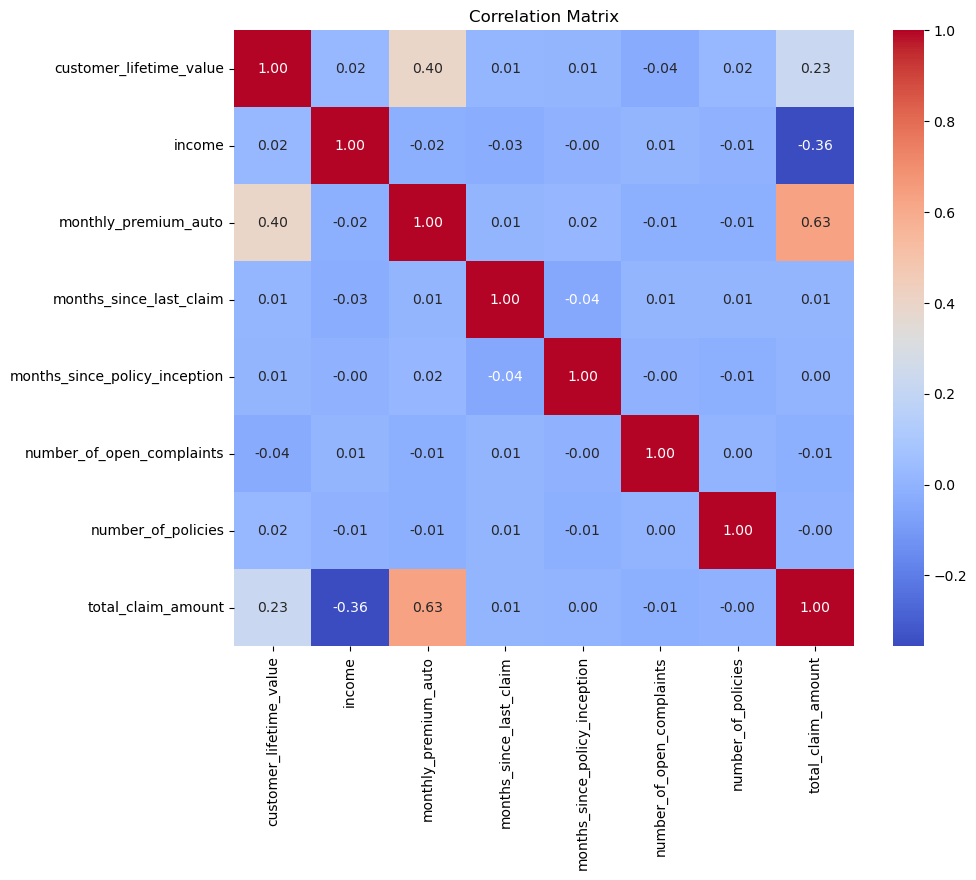

Observations:
 - Correlation matrix helps identify relationships between continuous variables.
 - There is a strong positive correlation (close to 1.0) between the 'total_claim_amount' and 'customer_lifetime_value' variables, suggesting that customers with higher lifetime values tend to have higher total claim amounts.


In [39]:
print("\nPart 4: Correlation Matrix")
print("==========================")
# Exclude non-numeric columns (e.g., 'customer_id')
numeric_customer_df = customer_df.select_dtypes(include=['number'])
correlation_matrix = numeric_customer_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
print("Observations:")
print(" - Correlation matrix helps identify relationships between continuous variables.")
print(" - There is a strong positive correlation (close to 1.0) between the 'total_claim_amount' and 'customer_lifetime_value' variables, suggesting that customers with higher lifetime values tend to have higher total claim amounts.")

In [ ]:
# Plot every continuous variable


Part 5: Continuous Variables


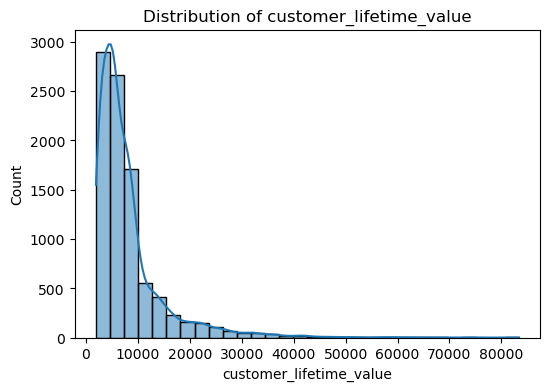

Observations for customer_lifetime_value:


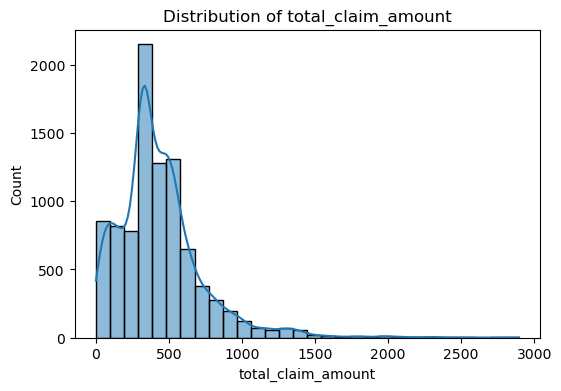

Observations for total_claim_amount:


In [40]:
print("\nPart 5: Continuous Variables")
print("=============================")
continuous_vars = customer_df.select_dtypes(include=['float64'])
for col in continuous_vars.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=customer_df, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"Observations for {col}:")

**Distribution Lifetime Value**

-The distribution of 'customer_lifetime_value' appears to be right-skewed, meaning that most customers have relatively lower lifetime values, while there are a few customers with exceptionally high lifetime values.

-The majority of customers fall within the lower range of lifetime values, with a peak in the distribution around that area.

-There is a long tail on the right side of the distribution, indicating the presence of outliers or a small number of customers with significantly higher lifetime values.

-The distribution suggests that the customer base may be segmented into two groups: one with low to moderate lifetime values and another with high lifetime values.

**Total Claim Amount**

-The distribution of 'total_claim_amount' appears to be right-skewed, with a longer tail on the right side of the distribution.

-Most of the claims are relatively small in value, and there is a peak in the distribution around the lower claim amounts.

-While the majority of claims are small, there are some larger claims that contribute to the right-skewness of the distribution.

-The presence of outliers on the right side of the distribution suggests that there are a few claims with significantly higher amounts compared to the rest of the claims.



In [41]:
# Part 6: Plot categorical variables


Part 6: Categorical Variables


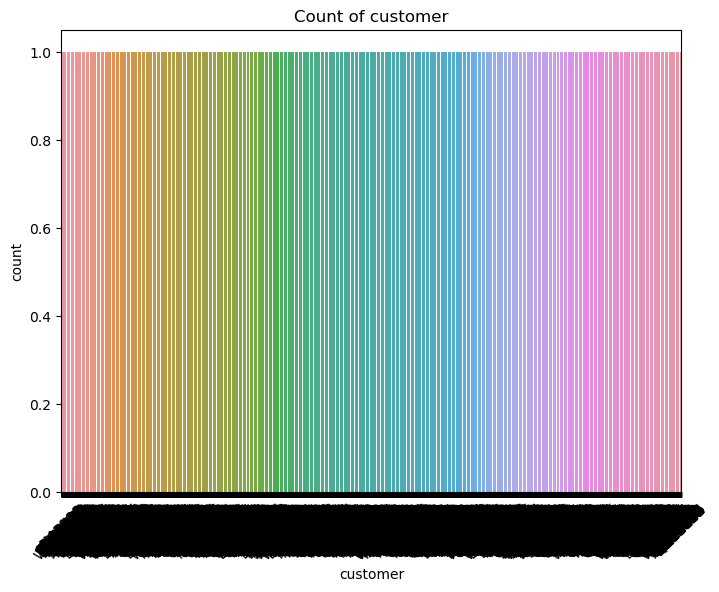

Observations for customer:


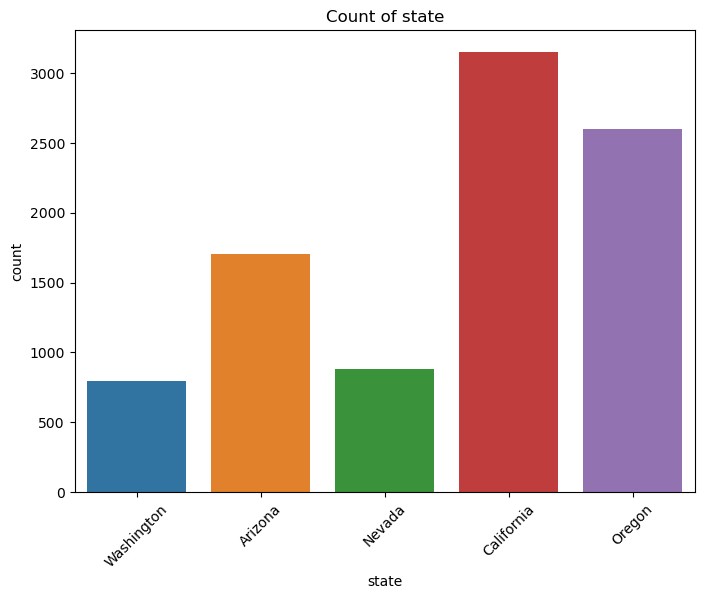

Observations for state:


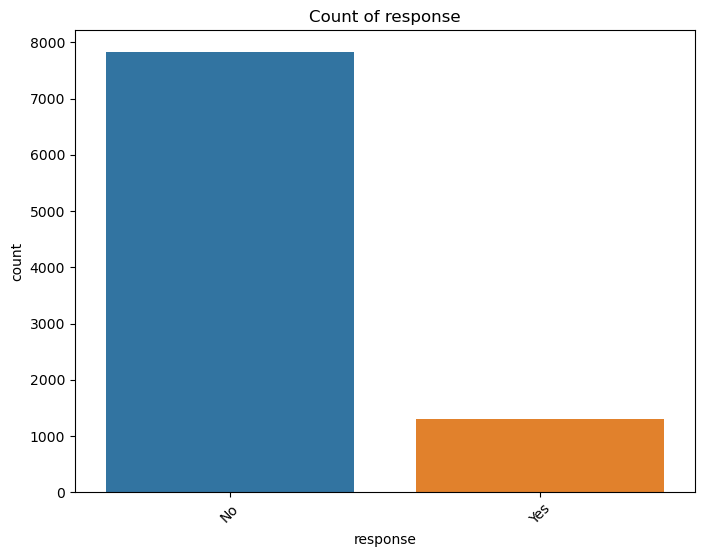

Observations for response:


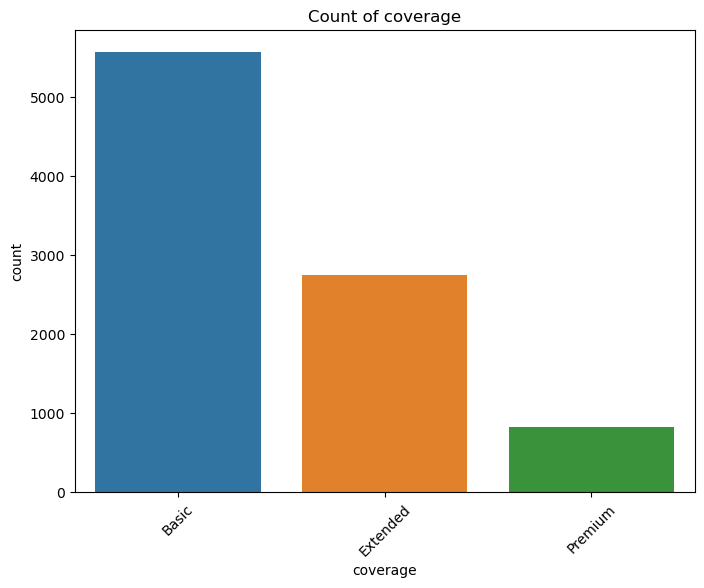

Observations for coverage:


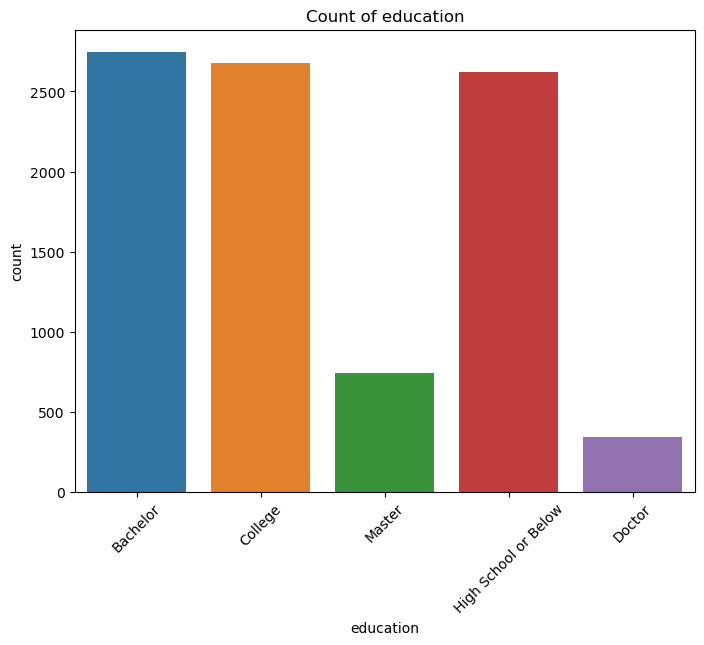

Observations for education:


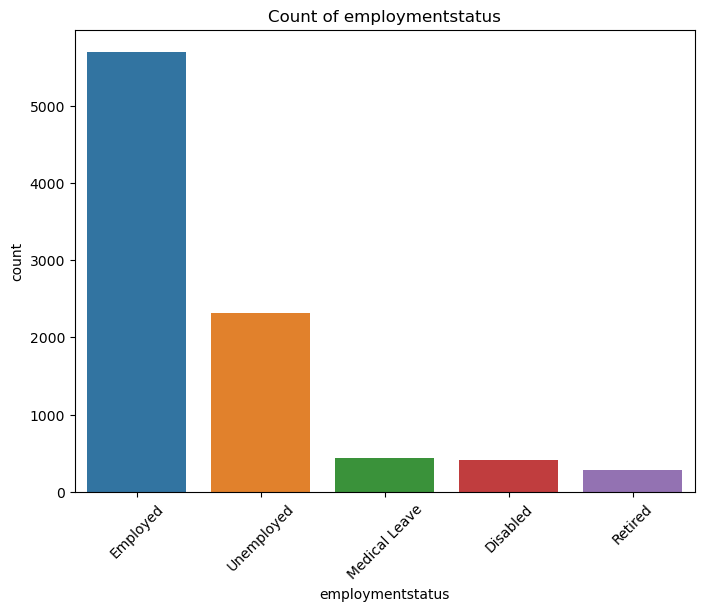

Observations for employmentstatus:


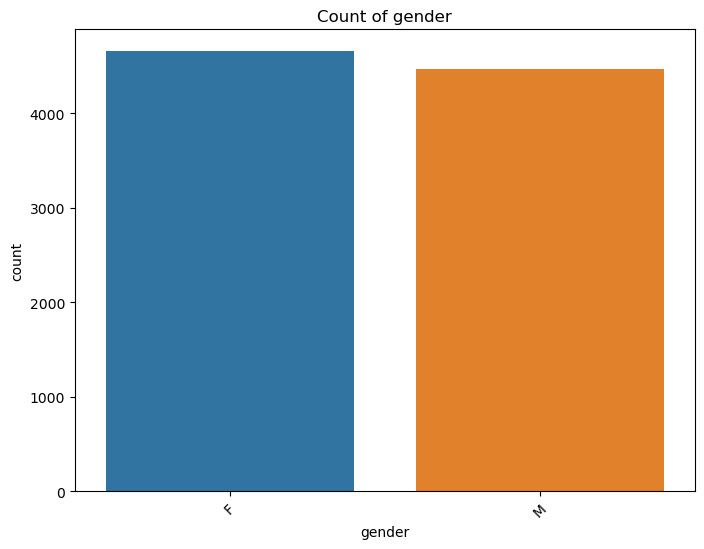

Observations for gender:


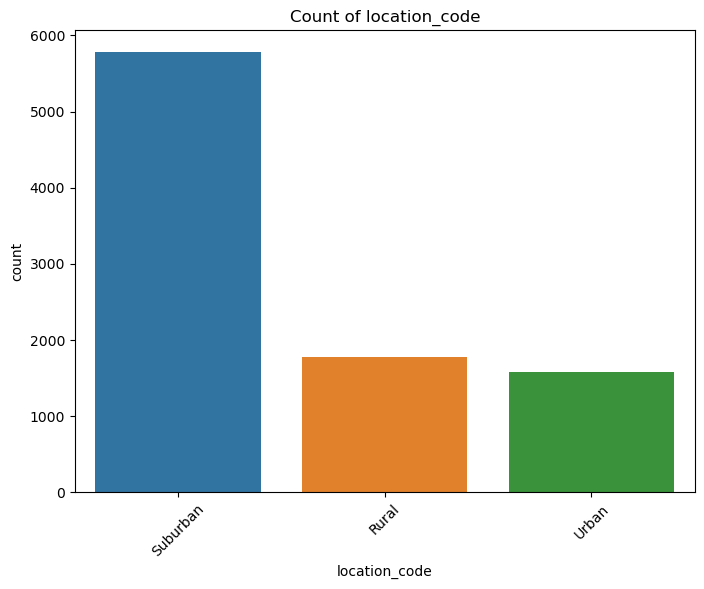

Observations for location_code:


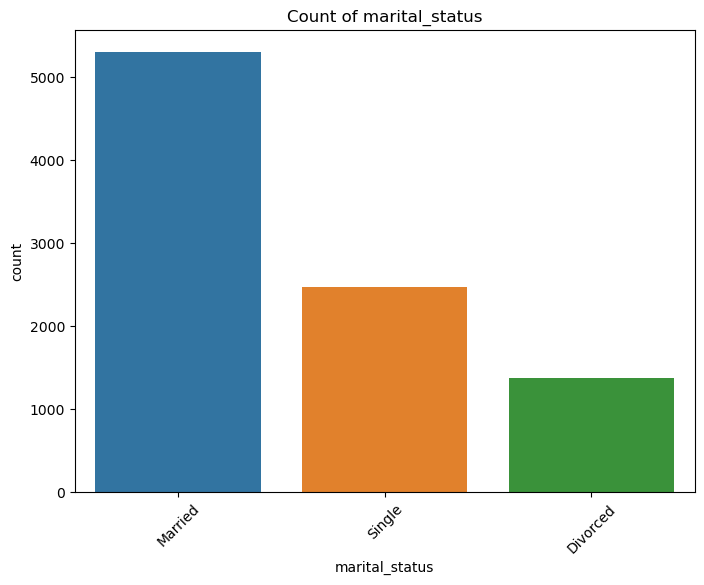

Observations for marital_status:


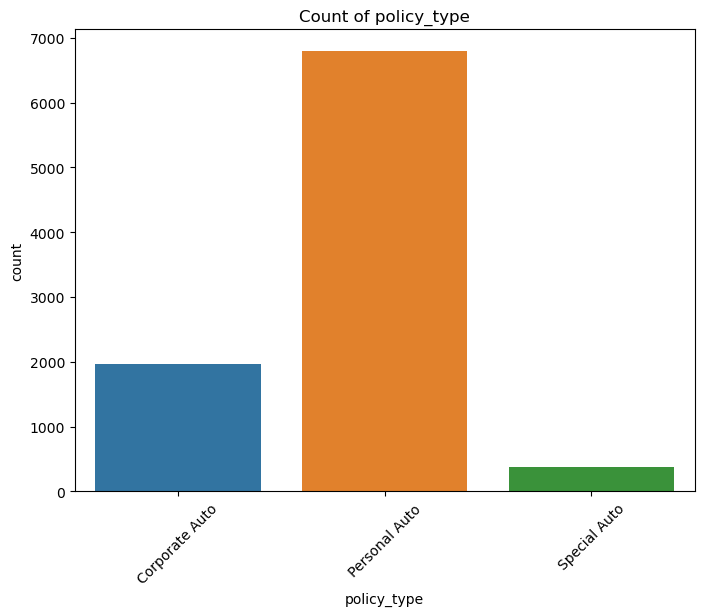

Observations for policy_type:


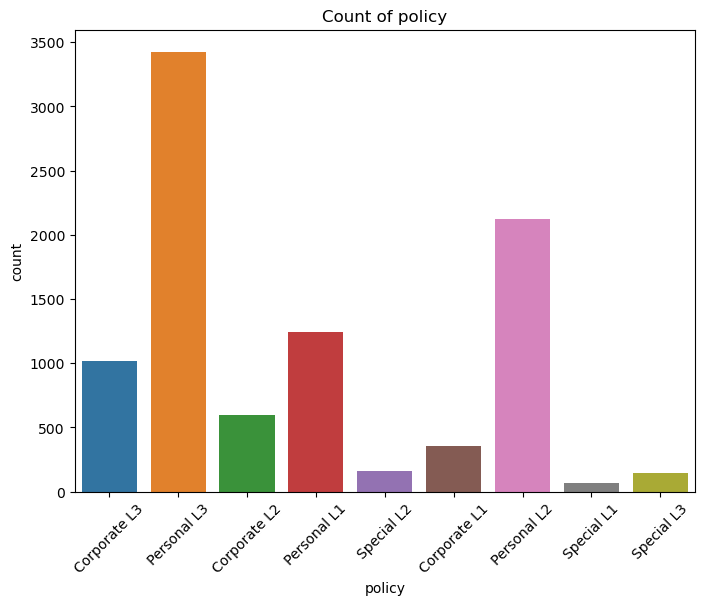

Observations for policy:


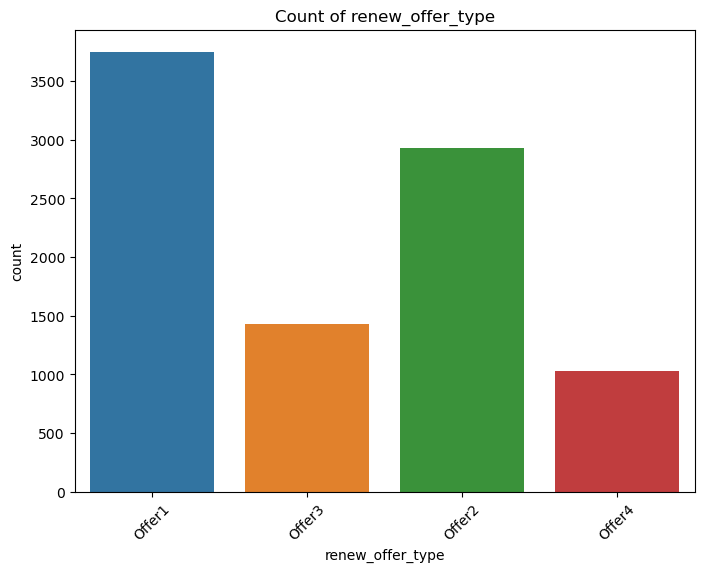

Observations for renew_offer_type:


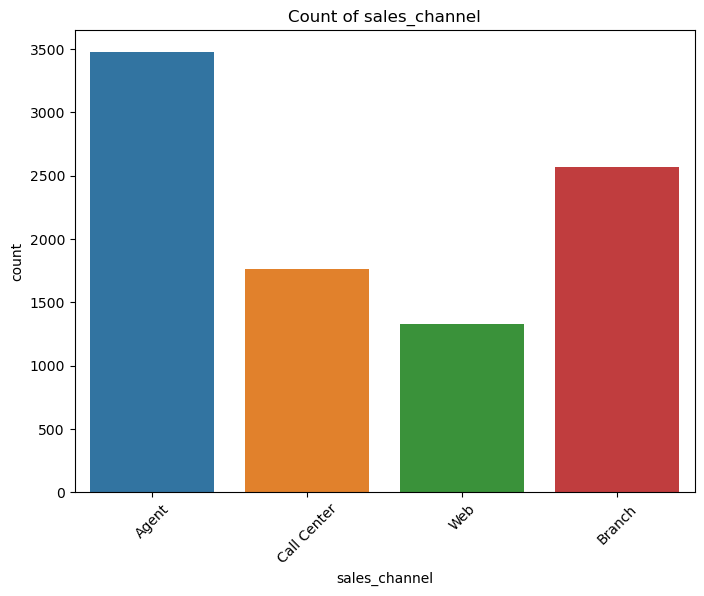

Observations for sales_channel:


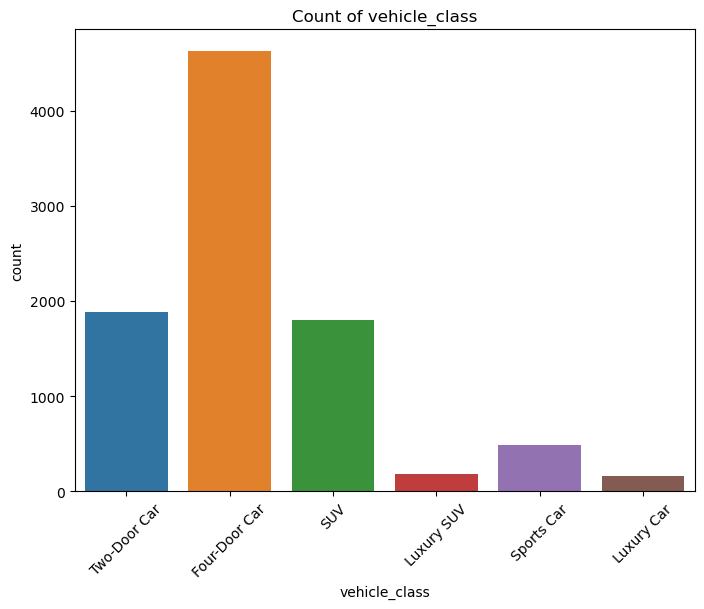

Observations for vehicle_class:


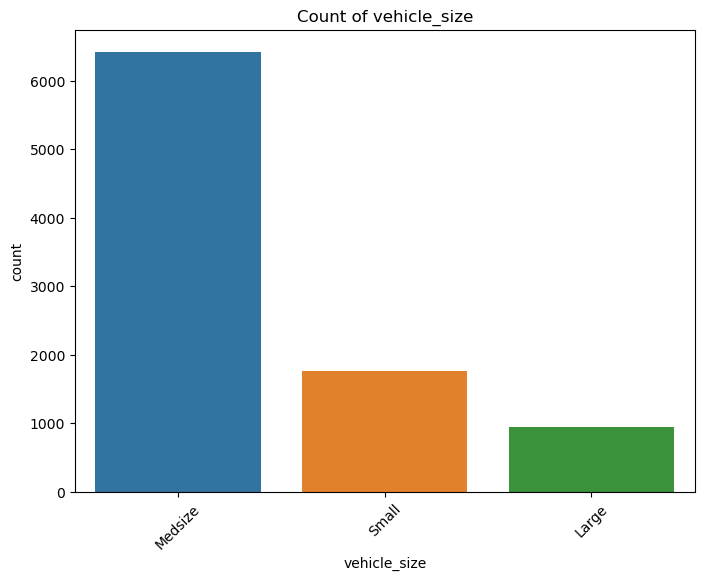

Observations for vehicle_size:
Why customer_id is deleted:
 - customer_id is not a useful feature for analysis as it is just an identifier and does not provide meaningful insights.


In [44]:
print("\nPart 6: Categorical Variables")
print("=============================")
categorical_vars = customer_df.select_dtypes(include=['object'])

# Check if 'customer_id' exists and drop it if present
if 'customer_id' in categorical_vars.columns:
    categorical_vars = categorical_vars.drop(columns='customer_id')

for col in categorical_vars.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=categorical_vars, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()
    print(f"Observations for {col}:")
    
print("Why customer_id is deleted:")
print(" - customer_id is not a useful feature for analysis as it is just an identifier and does not provide meaningful insights.")

**Obeservation**

**Policy Type (Policy_Type):**

- Most customers have "Personal Auto" policies.
- "Special Auto" policies are the least common.

**Policy (Policy):**

- Policy distribution varies, with "Personal L3" being the most common.
- "Personal L1" and "Special L2" policies are less frequent.

**EmploymentStatus (Employment_Status):**

- Majority of customers are employed.
- There's a significant number of retired and unemployed customers as well.

**Location Code (Location_Code):**

- Most customers live in "Suburban" areas.
- Fewer customers reside in "Rural" and "Urban" areas.

**Vehicle Class (Vehicle_Class):**

- "Four-Door Car" is the most common vehicle class.
- "Luxury Car" and "Sports Car" are less frequent.

**Vehicle Size (Vehicle_Size):**

- The majority of customers have "Medsize" vehicles.
- "Small" and "Large" vehicle sizes are less common.

**Coverage (Coverage):**

- Many customers have "Basic" coverage.
- "Extended" and "Premium" coverage types are less chosen.

In [45]:
# Part 7: Look for outliers in continuous variables


Part 7: Outliers in Continuous Variables


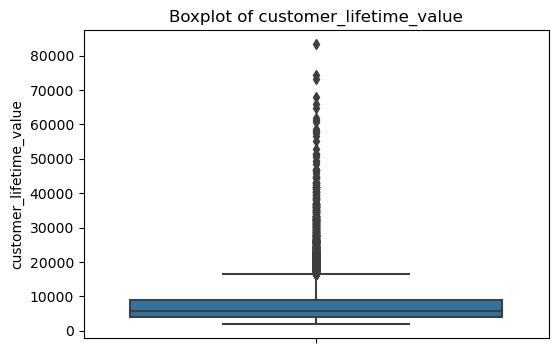

Observations for customer_lifetime_value outliers:
 - Describe the observations regarding outliers and what to do with them


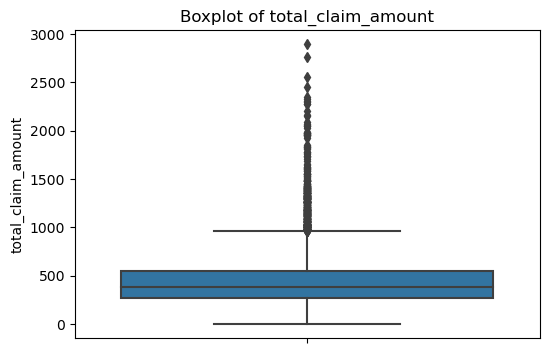

Observations for total_claim_amount outliers:
 - Describe the observations regarding outliers and what to do with them


In [46]:
print("\nPart 7: Outliers in Continuous Variables")
print("=========================================")
for col in continuous_vars.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=customer_df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()
    print(f"Observations for {col} outliers:")
    print(" - Describe the observations regarding outliers and what to do with them")

**Customer Lifetime Value (Customer_LTV):**

Most customers have relatively consistent and typical lifetime values within a moderate range.
There are a few customers with exceptionally high lifetime values, considered outliers.
Total Claim Amount (Total_Claim_Amount):

**The majority of claims have relatively low to moderate amounts.**

There are a few claims with exceptionally high amounts, indicating outliers in the distribution.

In [47]:
# Part 8: Check for NaN values

In [49]:
print("\nPart 8: Check for NaN Values")
print("=============================")
nan_values = customer_df.isnull().sum()
print("NaN Values in Each Column:")
print(nan_values)
print("Actions to consider for NaN values:")
print(" - There are no missing values (NaNs) present in the dataset. All columns appear to have complete data, which is good for analysis since missing data can lead to inaccuracies in the results.")


Part 8: Check for NaN Values
NaN Values in Each Column:
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64
Actions to consider for NaN values:
 - There are no missing values (NaNs) present in the d